# Fitting Plots

Essential for determining the fit of a model to raw data, curve fitting is ubiquitous. Using the `scipy.optimize.curve_fit` functionality, we can define a function to fit the data.

By the end of this file you should be able to:
1. Fit data to a predefined function

Further reading:    
https://lmfit.github.io/lmfit-py/intro.html  
https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.optimize.curve_fit.html   
https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.least_squares.html  
  
Finding error in fitting paramaters:  
https://stackoverflow.com/questions/14581358/getting-standard-errors-on-fitted-parameters-using-the-optimize-leastsq-method-i

In [1]:
# Python imports
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import normal
from scipy.optimize import curve_fit

## Fit a nonlinear  (exponential) function:

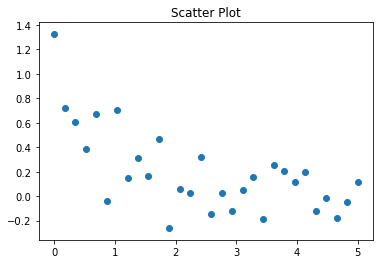

In [2]:
np.random.seed(1) # Use a seed for the random number generator

X = np.linspace(0, 5, 30)
Y = np.exp(-X) + normal(0, 0.2, 30)

plt.scatter(X,Y)
plt.title('Scatter Plot')
plt.show()

Now that we have the data, let's see about a fit. We use the curve_fit function from the scipy.optimize module, which requires a function and the data. 

A guess parameter (`p0`, optional) is important for exponential fits:

In [3]:
def func(x_vals, A, B, C):
    return A * np.exp(-B * x_vals) + C

init_guess = (1, 1e-6, 1) # Use an initial guess (optional)
popt, pcov = curve_fit(func, X, Y, p0=init_guess)

print('Optimized parameters are: {}'.format(popt))

Optimized parameters are: [ 1.11143768  1.50030349  0.03482195]


The outputs are the optmized parameters (popt) and the covariance matrix (pcov) of the optimized parameters. 

Next, we apply the optimization parameters to the functions to generate a plot that shows the fit:


In [4]:
x_fitted = np.linspace(0, 5)
y_fitted = func(x_fitted, *popt) # Apply func using opt to x_fitted

Above, `func` is called on `x_fitted`, using the starred (unpacked) expression (list) of `popt` optimal parameters.

Python starred expressions:
`*list` unpacks a list to create an iterable. For example, \*[1,2,3,4] unpacks to 1,2,3,4.

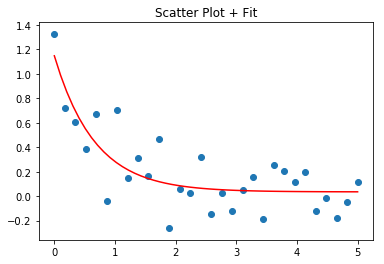

In [5]:
# Plot
plt.scatter(X,Y)
plt.plot(x_fitted,y_fitted, color="red")
plt.title('Scatter Plot + Fit')
plt.show()

### How accurate are the estimated parameters for the data?

The output of the curve_fit function includes `pcov`, the estimated covariance of `popt`. 

**Properly estimating the variance is an in-depth statistical problem.** However, if we are to trust the assumptions `curve_fit` make (type of data, relationships between estimated parameters, etc), then the square root of the diagonals of the `pcov` from above approximates the error. This should be done with much caution!

In [6]:
perr = np.sqrt(np.diag(pcov)) # One standard deviation errors in the 
                             #    parameters
print('Estimated errors are: {}'.format(perr))

Estimated errors are: [ 0.16809605  0.44470175  0.05436591]


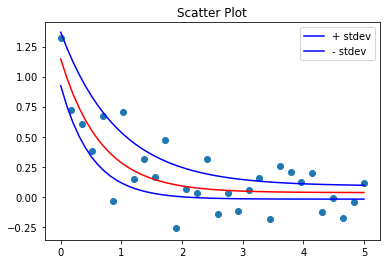

In [7]:
# Remember that func is: A * np.exp(-B * x_vals) + C
std_p = [perr[0], -perr[1], perr[2]] # Combination of perr for highest values
std_m = [-perr[0], perr[1], -perr[2]]# Combination of perr fpr lowest values

# Determine the plots for the ± standard deviation
y_fitted_p = func(x_fitted, *(popt+std_p))
y_fitted_m = func(x_fitted, *(popt+std_m))

# Plot
plt.scatter(X,Y)
plt.plot(x_fitted,y_fitted, color="red")
plt.plot(x_fitted,y_fitted_p, color="blue", label='+ stdev')
plt.plot(x_fitted,y_fitted_m, color="blue", label='- stdev')
plt.title('Scatter Plot')
plt.legend(loc='best')

plt.show()

# Gaussian fit:

Here, we generate a lot of normally distributed random numbers and use the histogram of the normally distributed numbers to fit a guassian curve. 

Here, a bounds parameter (`bounds`) is optional in the same way the `p0` was:

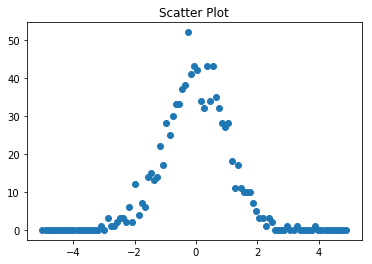

In [8]:
rand_gen = normal(0,1,1000)               # Generate numbers
bins = np.linspace(-5,5,num=100)
histogram = np.histogram(rand_gen,bins);  # Use histogram to get the
                                          #    distribution
X = histogram[1][:-1]
Y = histogram[0]
plt.scatter(X,Y)
plt.title('Scatter Plot')
plt.show()

In [9]:
def gauss_func(x_vals, ampl, sig, mu):
    return ampl * np.exp(-(-x_vals-mu)**2/(2*sig**2))

bounds_set = ([0,0,0],[max(Y)*10, 10, 1]) # We can set bounds on the fit too
popt, pcov = curve_fit(gauss_func, X, Y, bounds=bounds_set)

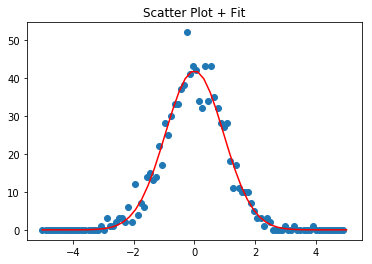

In [10]:
x_fitted = np.linspace(-5, 5)
y_fitted = gauss_func(x_fitted, *popt)

plt.scatter(X,Y)
plt.plot(x_fitted,y_fitted, color='red')
plt.title('Scatter Plot + Fit')
plt.show()

## Curve fitting methods in `curve_fit`

Note that the `method`, a changeable parameter in `curve_fit` defaults to the 
Levenberg-Marquardt[1] algorithm as implemented in MINPACK. If bounds are provided, `method` defaults to the Trust Region Reflective[2] algorithm.

[1] J. J. More, “The Levenberg-Marquardt Algorithm: Implementation and Theory,” Numerical Analysis, ed. G. A. Watson, Lecture Notes in Mathematics 630, Springer Verlag, pp. 105-116, 1977.

[2] M. A. Branch, T. F. Coleman, and Y. Li, “A Subspace, Interior, and Conjugate Gradient Method for Large-Scale Bound-Constrained Minimization Problems,” SIAM Journal on Scientific Computing, Vol. 21, Number 1, pp 1-23, 1999.